In [135]:
#importing liabary
from sklearn.datasets import make_regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
import random
from sklearn.metrics import r2_score

In [131]:
#creating dataset
x,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=50,random_state=13)

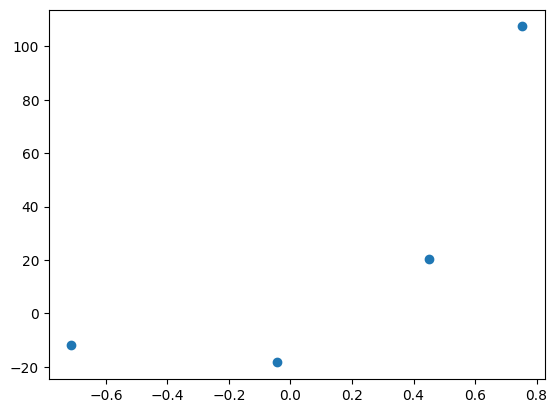

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x,y)


In [14]:
#using ols
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [15]:
#slope
lr.coef_


array([71.80824028])

In [16]:
lr.intercept_

16.34977052695789

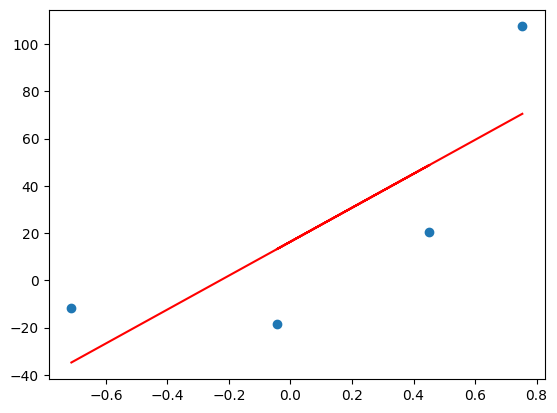

In [17]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')

In [19]:
#applying gradient descent as slope constant at m = 71.8
#starting value for intercept b = 0
y_pred = ((71.8 * x) + 0).reshape(4)

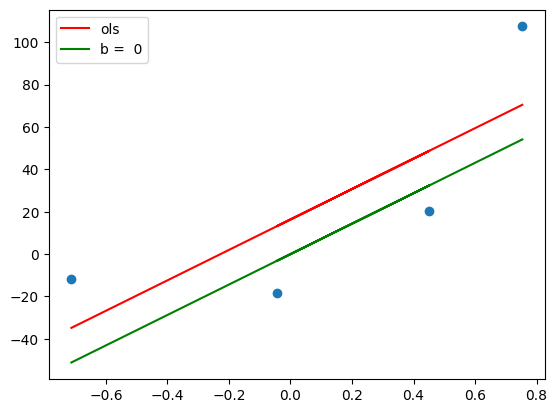

In [20]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='ols')
plt.plot(x,y_pred,color='green',label='b =  0')
plt.legend()
plt.show()

In [22]:
m = 71.8
b = 0

loss_slope = -2 * np.sum(y - m * x.ravel() - b)
loss_slope

-130.8055587937504

In [23]:
#learning rate at 0.1
lrr = 0.1

step_size = loss_slope*lrr
step_size

-13.08055587937504

In [24]:
#calculating the new inetrcept
b = b - step_size
b

13.08055587937504

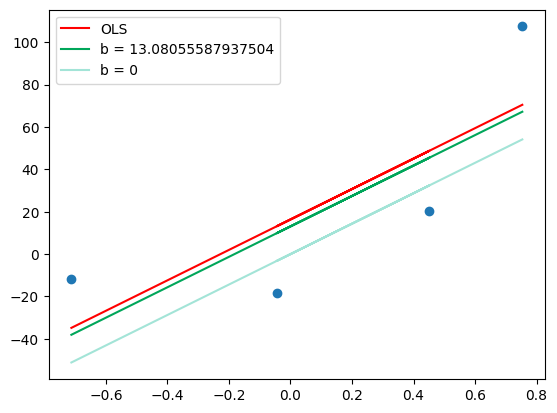

In [27]:
y_pred1 = ((71.8 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [28]:
#iteration2
loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

-26.16111175875008

In [29]:
step_size = loss_slope*lrr
step_size

-2.6161111758750084

In [30]:
b = b - step_size
b

15.69666705525005

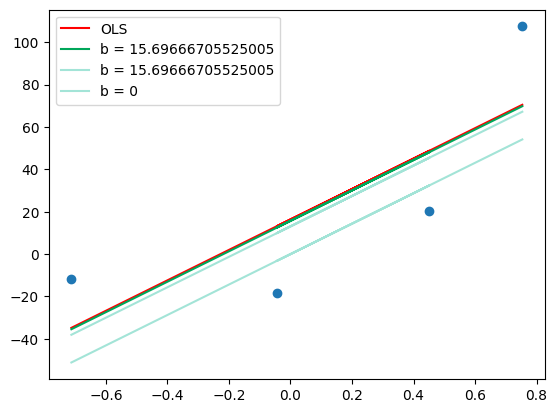

In [33]:
y_pred2 = ((71.8 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [34]:
#iteration3
loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

-5.232222351750011

In [35]:
step_size = loss_slope*lrr
step_size

-0.5232222351750011

In [36]:
b = b - step_size
b

16.21988929042505

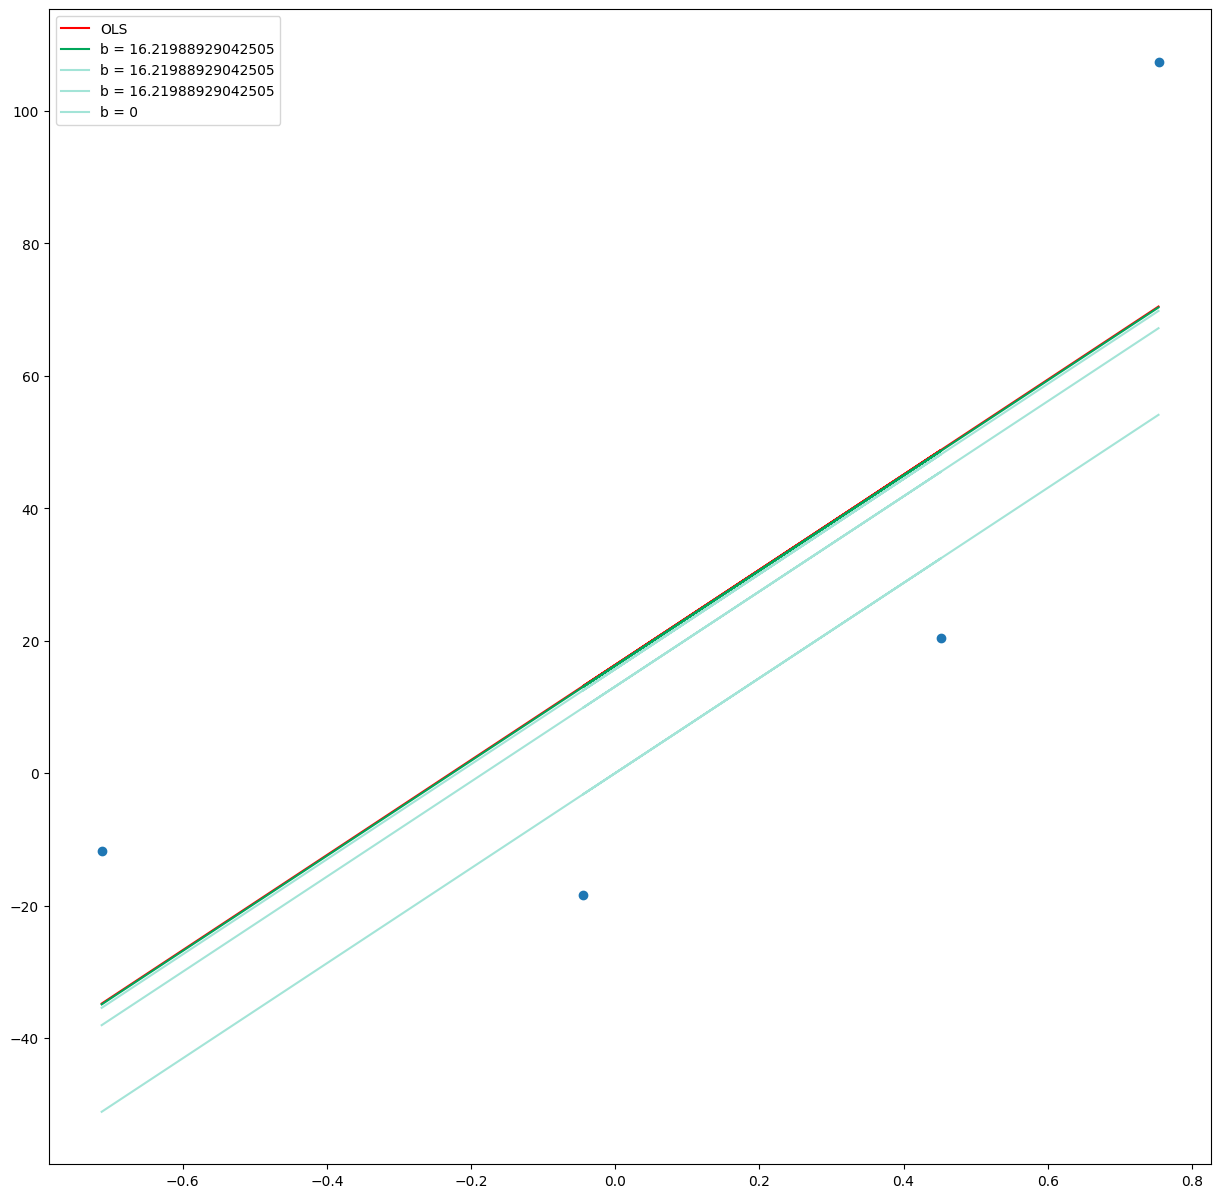

In [37]:
y_pred3 = ((71.8 * x) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(x,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

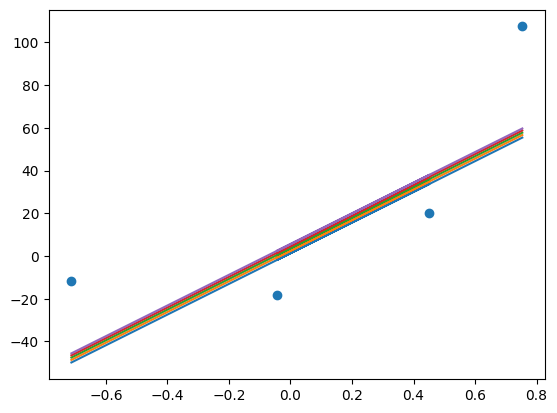

In [50]:
b = 0
m = 71.8
lrr = 0.01

epochs = 5

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*x.ravel() - b)
  b = b - (lrr * loss_slope)

  y_pred = m * x + b

  plt.plot(x,y_pred)

plt.scatter(x,y)

#creating class

In [178]:
a,c = make_regression(n_samples=1000,n_features=1,n_informative=1,n_targets=1,noise=50,random_state=30)


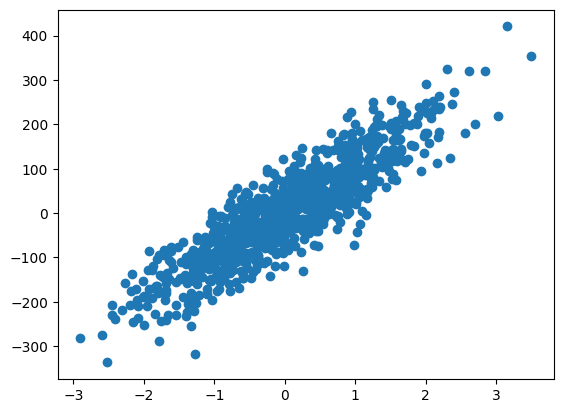

In [179]:
plt.scatter(a,c)

In [180]:
lr.fit(a,c)
print(lr.coef_)
print(lr.intercept_)

[97.52562341]
1.8180491165504988


In [181]:
np.mean(cross_val_score(lr,a,c,scoring='r2'))

0.7825090844591077

In [182]:
class GDRegressor:

  def __init__(self,learning_rate,epochs):
    self.m = 1
    self.b = -200
    self.lrr = learning_rate
    self.epochs = epochs

  def fit(self,a,c):
    # calculate b using gardient descent
    for i in range(self.epochs):

      loss_slope_b = -2 * np.sum(c - self.m*a.ravel() - self.b)
      loss_slope_m = -2 * np.sum((c - self.m*a.ravel() - self.b)*a.ravel())

      self.b = self.b - (self.lrr * loss_slope_b)
      self.m = self.m - (self.lrr * loss_slope_m)

    print(self.m,self.b)

  def predict(self,a):
    return self.m * x + self.b


In [183]:
gd = GDRegressor(0.0001,1000)

In [184]:
gd.fit(a,c)

97.52562340718315 1.8180491165504995


In [185]:

gd.predict(a)

array([[-67.65829431],
       [ 45.88132912],
       [ -2.52214134],
       [ 75.3295851 ]])